In [1]:
from reframed import Community, Environment
from reframed import load_cbmodel, FBA, plot_flux_envelope

Load individual models

In [2]:
CAL2 = load_cbmodel('../GEMs/CAL2.xml')
SAL9 = load_cbmodel('../GEMs/SAL9.xml')
MAM2 = load_cbmodel('../GEMs/MAM2.xml')

create community model by merging individual models

In [70]:
community = Community('RA_community', [CAL2, SAL9, MAM2]).merge_models()

retrieve the medium composition from the CAL2 model, to use as constraints

In [71]:
cal_medium = Environment.from_model(CAL2)
print(f"Environment compounds: {', '.join(cal_medium.get_compounds())}")

Environment compounds: pi, co2, fe3, h, mn2, fe2, glc__D, zn2, mg2, ca2, ni2, cu2, sel, cobalt2, h2o, mobd, so4, phe__L, nh4, k, na1, cl, o2, tungs, slnt


In [81]:
complete_env = Environment.complete(CAL2)

add arabinose restriction manually, since external arabinose is not present in the K12 model (and therefore not in CAL2 module) but is in the BL21 model (MAM2)

In [72]:
cal_medium.update({"R_EX_arab__D_e": (0.0, "inf")})

bound the RA transport reaction in RA module so that the community cannot grow on RA

In [73]:
community.set_flux_bounds('R_RAt_MAM2', 0, 1000)

standard FBA

In [76]:
solution = FBA(community, constraints=cal_medium, objective=community.biomass_reaction)

print(solution)
solution.show_values(pattern='R_EX')

Objective: 0.0
Status: Optimal

R_EX_pyr_e    7.00989
R_EX_h_e      24.33
R_EX_glc__D_e -10
R_EX_o2_e    -1.33993
R_EX_hxa_e    4.33004
R_EX_h2o_e    7.00989
R_EX_for_e    12.9901


does there exist an exhange reaction so that if uptake of that metabolite is allowed then growth becomes possible? (estimated worst-case runtime about 3 minutes)

In [100]:
#iterate over all exhange reactions and print the reaction name if objective > 0

exhange_reactions = community.get_exchange_reactions()

for reaction in exhange_reactions:

    medium = Environment.from_model(CAL2) #reset the medium each loop

    medium.update({reaction: (-10, "inf")}) #

    solution = FBA(community, constraints=medium, objective=community.biomass_reaction)

    #run the FBA
    if solution.values["community_growth"] > 0:
        print(reaction)
    
    

/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_amob_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_5drib_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_oxam_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_aacald_c
  warn(f"Constrained variable not previously declared: {r_id}")
/

In [17]:
solution.show_values(pattern='MAM2', sort=True)

R_Htex_MAM2  -14.4593
R_PGK_MAM2   -14.4593
R_ALCD2x_MAM2 -14.4593
R_ETOHtex_MAM2 -14.4593
R_PGM_MAM2   -14.4593
R_ETOHtrpp_MAM2 -14.4593
R_H2Otex_MAM2 -10.4242
R_H2Otpp_MAM2 -10.4242
R_PYRt2rpp_MAM2 -7.35952
R_PYRtex_MAM2 -7.35952
R_TRPAS2_MAM2 -7.09983
R_TRPt2rpp_MAM2 -7.09983
R_TRPtex_MAM2 -7.09983
R_ATPS4rpp_MAM2 -4.27496
R_PYNP2r_MAM2 -3.32439
R_PPM_MAM2   -3.32439
R_URIt2pp_copy2_MAM2 -3.32439
R_URItex_MAM2 -3.32439
R_RPE_MAM2   -2.21626
R_RPI_MAM2   -2.21626
R_TALA_MAM2  -1.10813
R_TKT1_MAM2  -1.10813
R_TKT2_MAM2  -1.10813
R_URAtex_MAM2  3.32439
R_URAt2pp_MAM2  3.32439
R_ATPM_MAM2   6.86
R_INDOLEtex_MAM2  7.09983
R_NH4tpp_MAM2  7.09983
R_NH4tex_MAM2  7.09983
R_INDOLEt2rpp_MAM2  7.09983
R_FBA_MAM2    7.78374
R_PFK_MAM2    7.78374
R_TPI_MAM2    7.78374
R_PGI_MAM2    10
R_HEX1_MAM2   10
R_GLCt2pp_MAM2  10
R_GLCtex_copy2_MAM2  10
R_PYK_MAM2    14.4593
R_ENO_MAM2    14.4593
R_GAPD_MAM2   14.4593
R_ACALDtex_MAM2  14.4593
R_ACALDtpp_MAM2  14.4593


In [14]:
solution.show_values(pattern='SAL9', sort=True)

R_Htex_SAL9  -9.15645
R_PGK_SAL9   -9.15645
R_ALCD2x_SAL9 -9.15645
R_TRPAS2_SAL9 -9.15645
R_NDPK4_SAL9 -9.15645
R_TRPt2rpp_SAL9 -9.15645
R_TRPtex_SAL9 -9.15645
R_ETOHtex_SAL9 -9.15645
R_PGM_SAL9   -9.15645
R_ETOHtrpp_SAL9 -9.15645
R_H2Otex_SAL9 -9.15645
R_H2Otpp_SAL9 -9.15645
R_ATPS4rpp_SAL9 -3.70482
R_RPI_SAL9   -1.88761
R_DHAtpp_SAL9 -0.281624
R_DHAtex_SAL9 -0.281624
R_ALKP_SAL9   0.281624
R_TALA_SAL9   1.88761
R_TKT1_SAL9   1.88761
R_TKT2_SAL9   1.88761
R_TPI_SAL9    3.4936
R_FBA_SAL9    3.77523
R_RPE_SAL9    3.77523
R_PFK_SAL9    3.77523
R_ATPM_SAL9   5.17
R_ARABDI_SAL9  5.66284
R_RBK_D1_SAL9  5.66284
R_DARBt2rpp_SAL9  5.66284
R_DARBtex_SAL9  5.66284
R_ENO_SAL9    9.15645
R_GAPD_SAL9   9.15645
R_ACALDtex_SAL9  9.15645
R_ACALDtpp_SAL9  9.15645
R_INDOLEtex_SAL9  9.15645
R_NH4tex_SAL9  9.15645
R_NH4tpp_SAL9  9.15645
R_INDOLEt2rpp_SAL9  9.15645
R_PYK6_SAL9   9.15645


In [18]:
solution.show_values(pattern='CAL2', sort=True)

R_ACALDtex_CAL2 -23.6158
R_ACALDtpp_CAL2 -23.6158
R_FORtex_CAL2 -22.0786
R_INDOLEtex_CAL2 -16.2563
R_NH4tpp_CAL2 -16.2563
R_NH4tex_CAL2 -16.2563
R_Htex_CAL2  -13.1818
R_HXAtex_CAL2 -7.35952
R_HEXt2rpp_CAL2 -7.35952
R_ACOAD2f_CAL2 -7.35952
R_PGK_CAL2   -5.82228
R_PGM_CAL2   -5.82228
R_URAtex_CAL2 -3.32439
R_ATPS4rpp_CAL2 -2.28667
R_DHAtpp_CAL2  0.281624
R_DHAtex_CAL2  0.281624
R_TALA_CAL2   1.10813
R_TKT1_CAL2   1.10813
R_TKT2_CAL2   1.10813
R_RPE_CAL2    2.21626
R_F6PA_CAL2   2.21626
R_RPI_CAL2    2.21626
R_DHAPT_CAL2  2.49788
R_TPI_CAL2    2.49788
R_PYNP2r_CAL2  3.32439
R_PPM_CAL2    3.32439
R_URIt2pp_copy2_CAL2  3.32439
R_URItex_CAL2  3.32439
R_URAtpp_CAL2  3.32439
R_PYK_CAL2    3.32439
R_ENO_CAL2    5.82228
R_GAPD_CAL2   5.82228
R_ATPM_CAL2   6.86
R_ECOAH1_CAL2  7.35952
R_ECOAH2_CAL2  7.35952
R_ACACT2r_CAL2  7.35952
R_HACD1_CAL2  7.35952
R_HACD2_CAL2  7.35952
R_ACACT1r_CAL2  7.35952
R_FACOAE60_CAL2  7.35952
R_ACOAD1fr_CAL2  7.35952
R_H2Otex_CAL2  12.2212
R_H2Otpp_CAL2  12.2212
R_FAD

### Production envelope (biomass to rosmarinic acid)

/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_amob_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_5drib_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_oxam_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_aacald_c
  warn(f"Constrained variable not previously declared: {r_id}")
/

<AxesSubplot: xlabel='Community growth rate', ylabel='R_EX_rosma_e'>

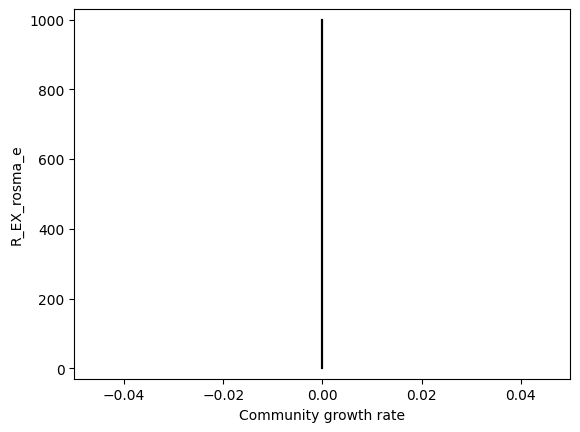

In [36]:
plot_flux_envelope(community, community.biomass_reaction, 'R_EX_rosma_e', constraints=cal_medium)

## Testing: simpler model

In [42]:
k12 = load_cbmodel('../GEMs/iML1515.xml')
bl21 = load_cbmodel('../GEMs/iHK1487.xml')

In [43]:
simple_com = Community('simple_community', [k12, bl21]).merge_models()

In [51]:
medium = Environment.from_model(bl21)
medium.update({"R_EX_arab__D_e": (0.0, "inf")})

In [49]:
solution = FBA(simple_com, constraints=medium)

print(solution)
solution.show_values(pattern='R_EX')

Objective: 0.0
Status: Optimal

R_EX_co2_e    3.44667
R_EX_h_e      5.3781
R_EX_lac__D_e  5.3781
R_EX_glc__D_e -4.41238
R_EX_o2_e    -1.72333
R_EX_acald_e  3.44667
R_EX_h2o_e    3.44667


/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_amob_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_oxam_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_5drib_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_aacald_c
  warn(f"Constrained variable not previously declared: {r_id}")
/

# Using merged model created through carveme

In [ ]:
merge_community CAL2.xml MAM2.xml SAL9.xml -o merged_ra_com.xml -i M9

In [3]:
merged_ra_com = load_cbmodel('../GEMs/merged_ra_com.xml')

In [5]:
merged_ra_com.summary()

Metabolites:
ext 356
c_CAL2 1073
p_CAL2 465
c_MAM2 1075
p_MAM2 465
c_SAL9 1065
p_SAL9 469

Reactions:
enzymatic 4444
transport 2502
exchange 375
sink 0
other 171


In [6]:
solution = FBA(merged_ra_com)

Objective: 0.4758188969948618
Status: Optimal

In [7]:
solution = FBA(merged_ra_com)

print(solution)
solution.show_values(pattern='R_EX')

Objective: 0.4758188969948618
Status: Optimal

R_EX_co2_e    7.24256
R_EX_ca2_e   -0.0024767
R_EX_cu2_e   -0.000337244
R_EX_zn2_e   -0.000162224
R_EX_cobalt2_e -1.19707e-05
R_EX_ac_e     12.8395
R_EX_k_e     -0.0928764
R_EX_fe2_e   -0.00392756
R_EX_mn2_e   -0.000328989
R_EX_h_e      24.763
R_EX_mg2_e   -0.00412784
R_EX_so4_e   -0.119821
R_EX_glc__D_e -10
R_EX_mobd_e  -3.30227e-06
R_EX_nh4_e   -5.13844
R_EX_o2_e    -10
R_EX_cl_e    -0.0024767
R_EX_ni2_e   -0.000153556
R_EX_pi_e    -0.45871
R_EX_fe3_e   -0.00371505
R_EX_meoh_e   9.51638e-07
R_EX_h2o_e    19.7215
R_EX_for_e    7.54791


<AxesSubplot: xlabel='Community growth rate', ylabel='R_EX_rosma_e'>

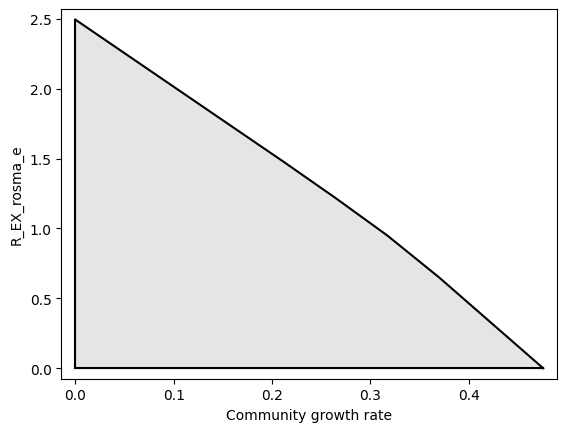

In [10]:
plot_flux_envelope(merged_ra_com, merged_ra_com.biomass_reaction, 'R_EX_rosma_e')